<a href="https://colab.research.google.com/github/JisungPark0319/education/blob/main/lab_ml/ml05_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
X = np.arange(0, 3).reshape((3,1))
y = 4 + 3 * X + np.random.randn(3,1)

X.shape, y.shape

((3, 1), (3, 1))

In [10]:
print(X)
print(y)

[[0]
 [1]
 [2]]
[[2.31121717]
 [6.19473979]
 [9.04409782]]


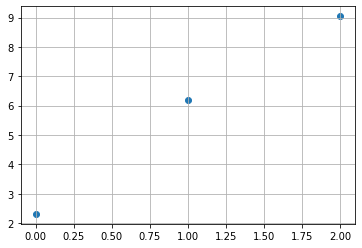

In [9]:
plt.scatter(X, y)
plt.grid()

In [12]:
X_b = np.c_[np.ones(shape=(3,1)), X]
X_b

array([[1., 0.],
       [1., 1.],
       [1., 2.]])

In [14]:
# MSE를 최소화하는 [b0, b1]을 찾는 게 선형회귀의 목적.
# [b0, b1]을 찾는 방법 1: 정규 방정식(normal equation)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best #> [[y절편], [기울기]]

array([[2.48357793],
       [3.36644033]])

In [16]:
y_pred = X_b @ theta_best
y_pred

array([[2.48357793],
       [5.85001826],
       [9.21645859]])

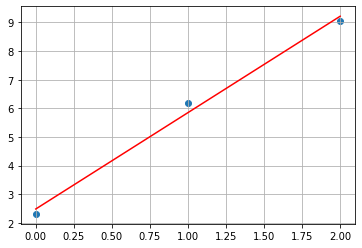

In [17]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r-')
plt.grid()
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X, y) # fit: 선형 회귀 방정식의 절편(intercept)과 기울기(coefficient)들을 찾는 과정.
lin_reg.intercept_, lin_reg.coef_

(array([2.48357793]), array([[3.36644033]]))

# Gradient Descent(경사 하강법)


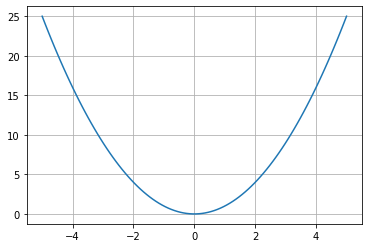

In [23]:
X = np.linspace(start=-5, stop=5, num=100)
y = X ** 2

plt.plot(X, y)
plt.grid()

# 기울기

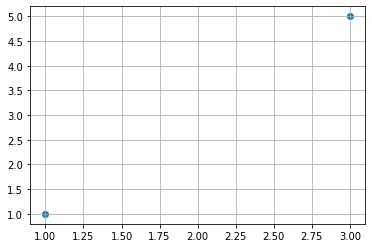

In [28]:
# 기울기: (y의 증가분) / (x의 증가분)
pt1 = [1, 1]
pt2 = [3, 5]

plt.scatter([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.grid()

In [29]:
delta_y = pt2[1] - pt1[1] # y 증가(감소)분
delta_x = pt2[0] - pt1[0] # x 증가(감소)분
slope = delta_y / delta_x
slope

2.0

In [37]:
def gradient(fn, x, h=0.001):
  return ( (fn(x + h) - fn(x)) / h )

In [38]:
def square(x):
  return x**2

In [39]:
# y = x**2 그래프에서 x=4에서의 접선의 기울기(gradient)
gradient(fn=square, x=4)

8.0010000000037

In [40]:
gradient(fn=square, x=-2)

-3.9989999999994197

In [41]:
gradient(fn=square, x=2)

4.000999999999699

## 경사 하강법
1. 임의의 점(x_init)을 선택
2. 그 점에서의 gradient(기울기)를 계산
3. 선택한 임의의 점을 이동: x_new = x_init - eta * gradient
4. 2 ~ 3의 과정을 반복.
* eta: 양수(eta > 0). 학습률(learning rate). eta가 크면 최솟값으로 빨리 수렴, 작으면 느리게 수렴.


In [50]:
def plot_function(fn):
  X = np.linspace(start=-5, stop=5, num=100)
  y = fn(X)
  plt.plot(X, y, '-')

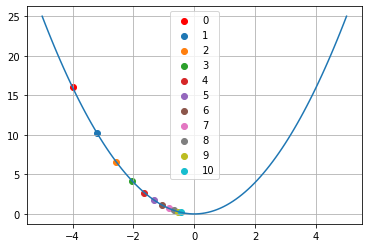

In [66]:
def plot_gradient_descent(fn, x_init, niterations=5, eta=0.1):
  plot_function(fn)

  y_init = fn(x_init)
  plt.scatter(x_init, y_init, label='0', color='red')

  for epoch in range(niterations):
    x_new = x_init - eta*gradient(fn, x_init)
    y_new = fn(x_new)
    plt.scatter(x_new, y_new, label=(epoch+1))
    x_init = x_new
  plt.grid()
  plt.legend()

plot_gradient_descent(square, -4, 10)

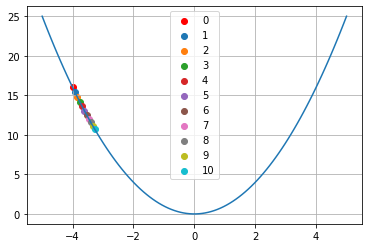

In [74]:
plot_gradient_descent(square, -4, 10, 0.01)

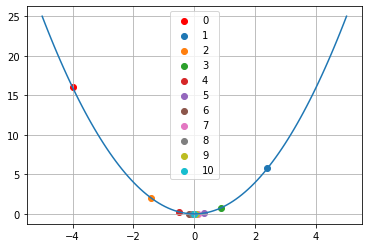

In [75]:
plot_gradient_descent(square, -4, 10, 0.8)

# 경사하강법을 사용한 선형회귀 방정식의 절편, 기울기 찾기: y = b0 + b1 * x
* 선형 회귀 방정식 'y = b0 + b1 * x'
* 절편(intercept, bias 편향): 'b0'
* 기울기(coefficient): 'b1'

In [83]:
np.random.seed(1)
X = np.arange(0, 3).reshape((3,1))
y =  4 + 3 * X + np.random.randn(3, 1)

In [84]:
X

array([[0],
       [1],
       [2]])

In [85]:
y

array([[5.62434536],
       [6.38824359],
       [9.47182825]])

In [87]:
X_b = np.c_[np.ones(shape=(3,1)), X]
X_b

array([[1., 0.],
       [1., 1.],
       [1., 2.]])

In [95]:
X_b.T

array([[1., 1., 1.],
       [0., 1., 2.]])

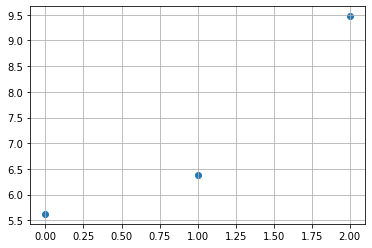

In [89]:
plt.scatter(X, y)
plt.grid()

[[0.417022  ]
 [0.72032449]]
[[3.76988582]
 [2.97460784]]


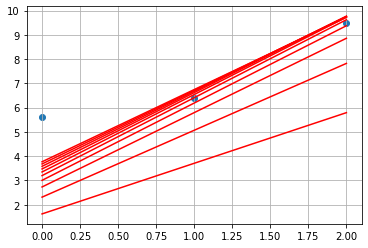

In [116]:
eta = 0.1 # 학습률(learnig rate)
m = 3 # 샘플 개수
n_iterations = 10 # 반복 횟수
np.random.seed(1)
theta = np.random.rand(2, 1) # [[b0], [b1]] 초깃값 - 난수 사용
print(theta)
plt.scatter(X, y)
for epoch in range(n_iterations):
  gradient = (2/m) * X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradient
  y_pred = X_b @ theta
  plt.plot(X, y_pred, 'r-')

plt.grid()
print(theta)

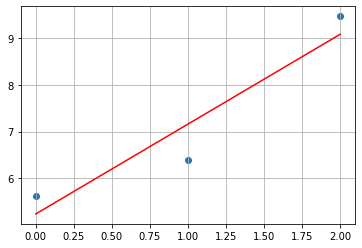

In [114]:
y_pred = X_b @ theta

plt.scatter(X, y)
plt.plot(X, y_pred, 'r-')
plt.grid()

In [107]:
from sklearn.linear_model import SGDRegressor
sgd_reg =SGDRegressor(eta0=0.1)
sgd_reg.fit(X, y)
# fit: MSE를 최소화하는 절편 b0와 계수 b1을 찾음.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [110]:
sgd_reg.intercept_, sgd_reg.coef_
# y = inter + coef * x

(array([4.97269462]), array([2.12148333]))

## 확률적 경사 하강법(Stochastic Gradient Descent)

In [118]:
np.random.seed(1)

m = 100 # 샘플 개수
X = 2 * np.random.rand(m, 1) # (m, 1) shape의 2d array
y = 4 + 3 * X + np.random.randn(m, 1)

X.shape, y.shape

((100, 1), (100, 1))

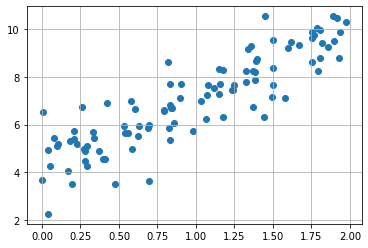

In [119]:
plt.scatter(X, y)
plt.grid()

In [156]:
X_b = np.c_[np.ones(shape=(m,1)), X] # bias가 추가된 샘플 행렬
theta = np.random.randn(2, 1) # 선형 회귀 방정식의 계수들 초깃값 - 난수 사용.
print(theta)

eta = 0.01
n_iterations = 1000 # 전체 반복 횟수(모든 샘플에서 gradient가 갱신되는 횟수)
for epoch in range(n_iterations):
  for i in range(m): # 샘플 개수 만큼 반복
    random_index = np.random.randint(m)  # 0 ~ m사이의 정수 중 난수 선택.
    xi = X_b[random_index:random_index + 1] # [[1, x]]: gradient를 계산할 샘플 1개
    yi = y[random_index:random_index + 1] # [[y]]: random_index에 있는 레이블
    gradient = 2 * xi.T @ (xi @ theta - yi) # gradient 계산
    theta = theta - eta*gradient # theta 업데이트


print(theta)

[[-1.83461214]
 [-1.44179455]]
[[4.34319725]
 [2.76859495]]


In [157]:
X_new = np.array([[1, 0], 
                  [1, 2]])
y_pred = X_new @ theta
y_pred

array([[4.34319725],
       [9.88038714]])

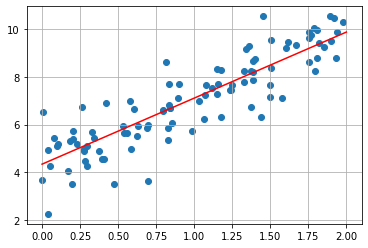

In [158]:
plt.scatter(X, y)

plt.plot([[0], [2]], y_pred, 'r-')

plt.grid()

In [161]:
sgd_reg = SGDRegressor(eta0=0.01, max_iter=50)
sgd_reg.fit(X, y)
sgd_reg.intercept_, sgd_reg.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([3.88816221]), array([3.14559777]))

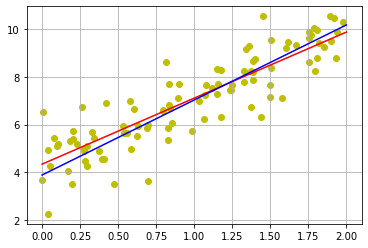

In [173]:
y_pred2 = sgd_reg.predict([[0], [2]])

plt.scatter(X, y, color='y')
plt.plot([[0], [2]], y_pred, 'r-')
plt.plot([[0], [2]], y_pred2, 'b-')
plt.grid()